## **Análisis exploratorio de datos**


El **Análisis Exploratorio de Datos (EDA)** es el primer paso en cualquier proyecto de análisis de datos o Machine Learning. Su objetivo es entender la estructura del conjunto de datos, detectar patrones, valores atípicos y problemas de calidad.

### **Importación de librerías**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### **Importación de datos del Dataset**

In [4]:
df = pd.read_csv('../data/raw/IA_PROPENSITY_TRAIN.csv', index_col=0)
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [6]:
df.shape

(58049, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58049 entries, CLI1 to CLI58048
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCTO         58049 non-null  object
 1   TIPO_CARROCERIA  58049 non-null  object
 2   COMBUSTIBLE      58049 non-null  object
 3   Potencia         58049 non-null  object
 4   TRANS            58049 non-null  object
 5   FORMA_PAGO       58049 non-null  object
 6   ESTADO_CIVIL     57159 non-null  object
 7   GENERO           57189 non-null  object
 8   OcupaciOn        58049 non-null  object
 9   PROVINCIA        58049 non-null  object
 10  Campanna1        58049 non-null  object
 11  Campanna2        58049 non-null  object
 12  Campanna3        58049 non-null  object
 13  Zona_Renta       44871 non-null  object
 14  REV_Garantia     58049 non-null  object
 15  Averia_grave     58048 non-null  object
 16  QUEJA_CAC        58049 non-null  object
 17  COSTE_VENTA      58049 non-nul

Nos disponemos a describir las variables incluidas en el dataset, utilizadas para el análisis de propensión de un cliente a comprar automóviles:


- **`CODE`** _(object)_ → Código único del cliente.
- **`PRODUCTO`** _(object)_ → Tipo de producto asociado al cliente.
- **`TIPO_CARROCERIA`** _(object)_ → Tipo de carrocería del vehículo.
- **`COMBUSTIBLE`** _(object)_ → Tipo de combustible utilizado.
- **`Potencia`** _(object)_ → Categoría de potencia del vehículo (Ej.: "Baja").
- **`TRANS`** _(object)_ → Tipo de transmisión (Ej.: manual, automática).
- **`FORMA_PAGO`** _(object)_ → Método de pago (Ej.: contado, financiera).
- **`ESTADO_CIVIL`** _(object, con valores nulos)_ → Estado civil del cliente.
- **`GENERO`** _(object, con valores nulos)_ → Género del cliente.
- **`OcupaciOn`** _(object)_ → Profesión del cliente (Ej.: "Funcionario", "Empresa").
- **`PROVINCIA`** _(object)_ → Ubicación geográfica del cliente.
- **`Campanna1`, `Campanna2`, `Campanna3`** _(object)_ → Posibles campañas de marketing asociadas al cliente.
- **`Zona_Renta`** _(object, con valores nulos)_ → Nivel socioeconómico del cliente.
- **`REV_Garantia`** _(object)_ → Indica si el cliente ha realizado revisiones en garantía.
- **`Averia_grave`** _(object, un valor nulo)_ → Historial de averías graves del vehículo.
- **`QUEJA_CAC`** _(object)_ → Indica si el cliente ha registrado una queja en atención al cliente.
- **`COSTE_VENTA`** _(int64)_ → Monto total de la venta (valor numérico).
- **`km_anno`** _(int64)_ → Kilómetros recorridos por año.
- **`Mas_1_coche`** _(bool)_ → Indica si el cliente tiene más de un coche.
- **`Revisiones`** _(int64)_ → Número de revisiones realizadas.
- **`Edad_Cliente`** _(int64)_ → Edad del cliente.
- **`Tiempo`** _(int64)_ → Tiempo en años desde que es cliente.


In [10]:
df.nunique() # Número de valores únicos por columna

PRODUCTO              11
TIPO_CARROCERIA        8
COMBUSTIBLE            2
Potencia               3
TRANS                  2
FORMA_PAGO             4
ESTADO_CIVIL           4
GENERO                 2
OcupaciOn              3
PROVINCIA             53
Campanna1              2
Campanna2              2
Campanna3              2
Zona_Renta             4
REV_Garantia           2
Averia_grave           4
QUEJA_CAC              2
COSTE_VENTA         2833
km_anno            21512
Mas_1_coche            2
Revisiones            14
Edad_Cliente          54
Tiempo                14
dtype: int64

In [11]:
df.describe(include='all') # Estadísticas descriptivas

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049,58049,58049,58049,58049,58049,57159,57189,58049,58049,58049,58049,58049,44871,58049,58048,58049,58049.000000,58049.000000,58049,58049.000000,58049.000000,58049.000000
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,4,2,4,2,NaN,NaN,2,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO,NaN,NaN,False,NaN,NaN,NaN
freq,15993,23387,33085,39906,52969,30190,43529,40170,53262,10874,37466,51103,51075,17152,32011,29935,36268,NaN,NaN,41107,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2540.125756,11805.893607,NaN,3.529587,47.351255,1.859119
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1603.556511,10205.363971,NaN,2.528413,11.239984,3.091309
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1595.000000,0.000000,NaN,1.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2353.000000,11486.000000,NaN,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3301.000000,17927.000000,NaN,5.000000,56.000000,4.000000


In [12]:
df.head(5)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,1818,0,True,3,21,3


### **Análisis de valores nulos**

En esta sección, se analizarán los valores nulos presentes en el dataset. La presencia de valores nulos puede afectar la calidad de los datos y, por lo tanto, el análisis de los mismos.

In [13]:
df.isnull().sum() # Valores nulos por columna

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

## **Propósito del análisis**

El propósito de este **Análisis Exploratorio de Datos (EDA)** es evaluar la **propensión de los clientes a comprar más de un coche**, utilizando la variable `Mas_1_coche` como referencia. Para ello, se analizarán factores clave como el tipo de vehículo (`TIPO_CARROCERIA`, `COMBUSTIBLE`, `Potencia`, `TRANS`), el comportamiento de compra (`FORMA_PAGO`, `COSTE_VENTA`, `Revisiones`, `km_anno`), y características sociodemográficas (`ESTADO_CIVIL`, `GENERO`, `Edad_Cliente`, `Zona_Renta`). Se busca identificar patrones en los clientes que poseen más de un coche, encontrar relaciones entre las variables y detectar factores que podrían influir en la compra de un segundo vehículo, lo que permitirá optimizar estrategias comerciales y de fidelización.


### **Distribución de la variable objetivo**

En esta sección, se analizará la distribución de la variable objetivo `Mas_1_coche`, que indica si el cliente tiene más de un coche. Se calculará el porcentaje de clientes que poseen más de un coche y se visualizará la distribución de la variable objetivo en un gráfico de barras.

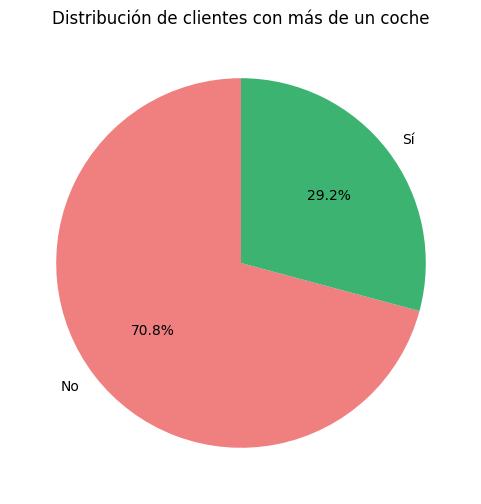

In [17]:
labels = ["No", "Sí"]

plt.figure(figsize=(6,6))
plt.pie(df["Mas_1_coche"].value_counts(), labels=labels, autopct="%1.1f%%", 
        colors=["lightcoral", "mediumseagreen"], startangle=90)

plt.title("Distribución de clientes con más de un coche")
plt.show()

A partir del gráfico de la variable **`Mas_1_coche`**, podemos extraer las siguientes conclusiones:

1. **La mayoría de los clientes (alrededor del 70%) solo tienen un coche**, lo que indica que la compra de un segundo vehículo no es un comportamiento dominante en la base de datos.
2. **Aproximadamente el 30% de los clientes poseen más de un coche**, lo que sugiere que existe un segmento significativo de clientes que adquieren múltiples vehículos.
3. **Oportunidad de segmentación:** Este 30% podría representar un grupo de clientes más propensos a comprar nuevamente, lo que podría ser aprovechado en estrategias de fidelización y marketing para incentivar la recompra.
4. **Análisis adicional:** Sería interesante explorar qué características diferencian a los clientes con más de un coche (edad, ingresos, tipo de vehículo, forma de pago, etc.) para identificar patrones y factores clave que influyen en esta decisión.

En general, este análisis ayuda a comprender la distribución de la variable objetivo y a enfocar estrategias comerciales en los clientes con mayor potencial de recompra.

### **Edad más común de los clientes**

#### **¿Por qué la edad del cliente es clave en la propensión a comprar más de un coche?**

**Poder adquisitivo y estabilidad financiera**
- Clientes **más jóvenes** pueden tener menos capacidad económica para adquirir múltiples vehículos.
- Clientes **mayores** pueden haber acumulado más recursos financieros, facilitando la compra de un segundo coche.

**Necesidades y estilo de vida**
- Personas en ciertas edades pueden necesitar más de un coche debido a **factores familiares, laborales o preferencias personales**.
- **Ejemplo:** Familias con hijos pueden necesitar dos vehículos para movilidad independiente.

**Etapas de la vida y cambios en la movilidad**
- **Adultos jóvenes (18-30 años)** pueden estar en transición hacia la independencia económica.
- **Adultos medios (30-50 años)** suelen estar en su mayor estabilidad financiera, lo que puede influir en la compra de más coches.
- **Adultos mayores (50+ años)** pueden mantener más de un coche por comodidad o costumbre.

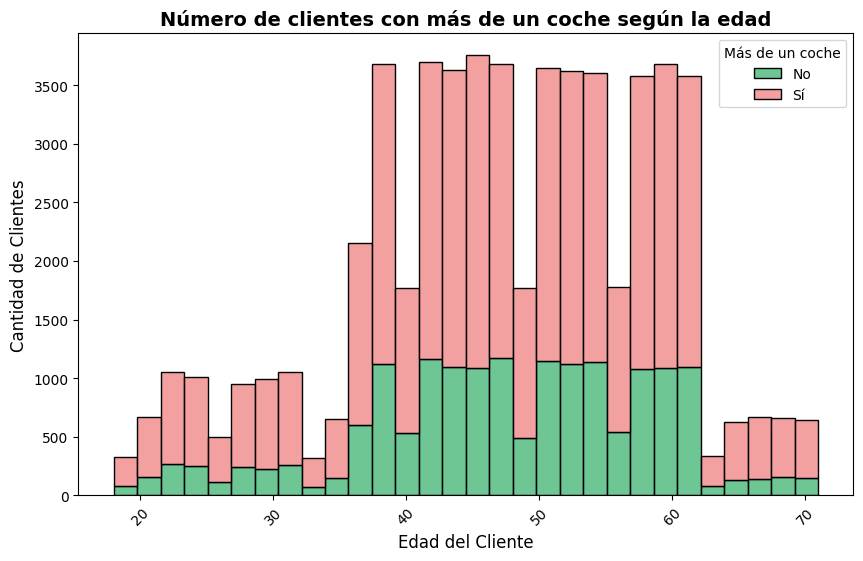

In [20]:
# Crear un gráfico de distribución con conteo real en lugar de proporción
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Edad_Cliente", hue="Mas_1_coche", multiple="stack", bins=30, palette=["lightcoral", "mediumseagreen"])

# Configuración del gráfico
plt.title("Número de clientes con más de un coche según la edad", fontsize=14, fontweight="bold")
plt.xlabel("Edad del Cliente", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.legend(title="Más de un coche", labels=["No", "Sí"])
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Observamos:
- La mayor cantidad de clientes se encuentra entre los 40 y 60 años.
- El número de clientes con más de un coche es significativamente mayor en este rango de edad.
- Los clientes jóvenes (18-30 años) rara vez compran más de un coche.
- A partir de los 65 años, la compra de más de un coche disminuye notablemente.

En conclusión, la edad entre 40 y 60 años es el rango donde hay más clientes y donde hay más propensión a comprar un segundo coche. Esto sugiere una gran oportunidad de ventas y fidelización en este segmento etario.

**Distrbución del coste de venta de los vehículos**

La variable **`COSTE_VENTA`** representa el monto total de la compra realizada por el cliente. Es una métrica clave porque puede indicar la relación entre el gasto en vehículos y la probabilidad de que un cliente adquiera más de uno. A continuación, se detallan las razones principales para incluir esta columna en el análisis:

**Poder adquisitivo y capacidad de gasto**  
- Un **mayor gasto en la compra de un vehículo** podría sugerir un cliente con **más recursos económicos**, lo que aumenta la probabilidad de adquirir otro coche.  
- Los clientes que compran coches más costosos pueden pertenecer a un segmento con **alta capacidad adquisitiva**, lo que los hace más propensos a compras repetidas.

**Diferencias en estrategias de compra**  
- Algunos clientes pueden **invertir más dinero en un solo vehículo de gama alta** en lugar de comprar múltiples coches.  
- Otros pueden preferir distribuir su presupuesto en **dos o más vehículos**, lo que podría reflejarse en el análisis del `COSTE_VENTA`.

**Relación entre coste y tipo de vehículo**  
- Es importante evaluar si los clientes con más de un coche tienden a **comprar coches más baratos**, lo que sugiere que prefieren diversificar su compra en varios vehículos en lugar de un solo modelo premium.  
- También podríamos encontrar que ciertos segmentos de clientes con altos valores en `COSTE_VENTA` **tienden a tener más de un coche**.



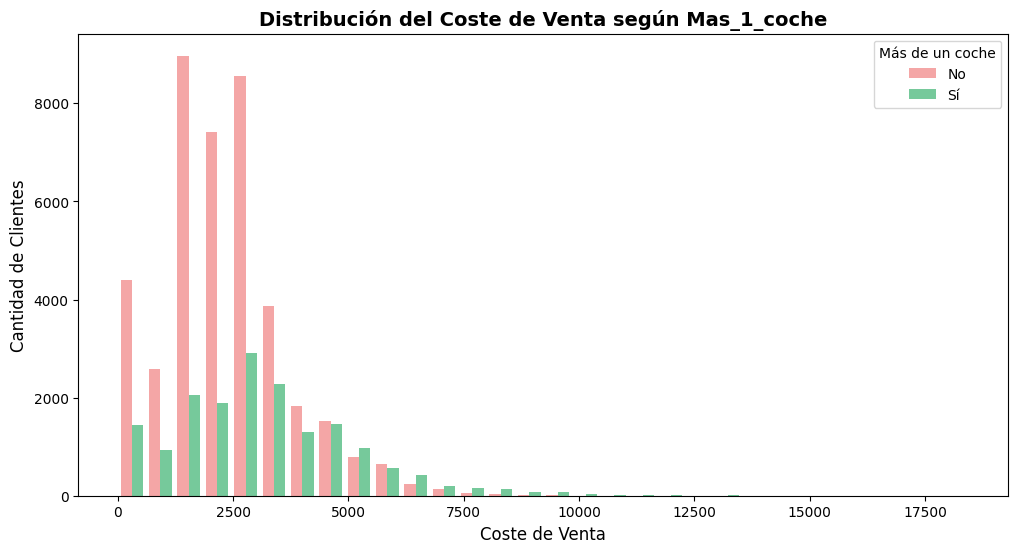

In [28]:
# Configurar colores y etiquetas
colores = ["lightcoral", "mediumseagreen"]
labels = ["No", "Sí"]

# Crear histograma
plt.figure(figsize=(12,6))
plt.hist([df[df["Mas_1_coche"] == False]["COSTE_VENTA"], 
          df[df["Mas_1_coche"] == True]["COSTE_VENTA"]], 
         bins=30, alpha=0.7, color=colores, label=labels)

# Configuración del gráfico
plt.title("Distribución del Coste de Venta según Mas_1_coche", fontsize=14, fontweight="bold")
plt.xlabel("Coste de Venta", fontsize=12)
plt.ylabel("Cantidad de Clientes", fontsize=12)
plt.legend(title="Más de un coche")

# Mostrar gráfico
plt.show()

- El gasto total es mayor en clientes que tienen más de un coche, pero también hay mucha variabilidad.
- El coste de venta más alto pertenece a clientes con un solo coche, lo que indica que algunos prefieren gastar más en un único vehículo en lugar de diversificar su inversión.
- La mediana y los cuartiles muestran que los clientes con más de un coche suelen gastar más que los que tienen solo uno, pero no necesariamente compran coches más caros.

